# Code for generating Fig. 9

## Imports

In [9]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from alphashape import alphashape
import torch
#Getting the full manifold data
df = pd.read_csv('no_avg_dataset.csv')

#Getting the alpha shape
z_array = np.concatenate((np.asarray(df["Z0"]).reshape(-1,1), np.asarray(df["Z1"]).reshape(-1,1)), axis = 1)
alpha_shape = alphashape(z_array, alpha = 1)

# Importing the error data
loaded_dist_dict = torch.load('error_for_datasets.pth')

### Alpha shape plotting function

In [2]:
def plot_alpha_shape(alpha_shape, ax = None):
    if ax is None:
        plt.plot(*alpha_shape.exterior.xy, color='black', linewidth=0.5, label='Alpha Shape')
        
    else:
        ax.plot(*alpha_shape.exterior.xy, color='black', linewidth=0.5, label='Alpha Shape')

## Plotting

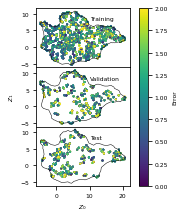

In [10]:
# Figure specs
fig_width_in = 8.3 /2.54  # 8.3cm for single column, 17.1cm for double, divided by 2.54 to convert cm to inches
aspect_ratio = 1
fig_height_in = fig_width_in / aspect_ratio
fontsize = 7

# Defining figure
fig, axs = plt.subplots(nrows = 3, ncols = 1, figsize = (fig_width_in, fig_height_in), sharex = True, sharey = True)

# Setting max and min error colors
vmax = 2
vmin = 0

# Getting data
train_coord_dist = loaded_dist_dict['train_coord_dist']
val_coord_dist = loaded_dist_dict['val_coord_dist']
test_coord_dist = loaded_dist_dict['test_coord_dist']

# Plotting training data
plt.sca(axs[0])
plot_alpha_shape(alpha_shape)
sp = axs[0].scatter(train_coord_dist[:,0], train_coord_dist[:,1], c = train_coord_dist[:,3], cmap = "viridis",vmin = vmin, vmax = vmax, s = 1)
axs[0].set_aspect('equal')
axs[0].tick_params(axis = 'y', labelsize = fontsize)
axs[0].text(10, 8, 'Training', fontsize = fontsize)

# Plotting validation data
plt.sca(axs[1])
plot_alpha_shape(alpha_shape)
sp = axs[1].scatter(val_coord_dist[:,0], val_coord_dist[:,1], c = val_coord_dist[:,3], cmap = "viridis",vmin = vmin, vmax = vmax, s = 1)
axs[1].set_xlabel(r'$Z_0$', fontsize = fontsize)
axs[1].set_ylabel(r'$Z_1$', fontsize = fontsize)
axs[1].set_aspect('equal')
axs[1].tick_params(axis = 'y', labelsize = fontsize)
axs[1].text(10, 8, 'Validation', fontsize = fontsize)

# Plotting test data
plt.sca(axs[2])
plot_alpha_shape(alpha_shape)
sp = axs[2].scatter(test_coord_dist[:,0], test_coord_dist[:,1], c = test_coord_dist[:,3], cmap = "viridis", vmin = vmin, vmax = vmax, s = 1)
axs[2].set_xlabel(r'$Z_0$', fontsize = fontsize)
axs[2].set_aspect('equal')
axs[2].tick_params(axis = 'y', labelsize = fontsize)
axs[2].tick_params(axis = 'x', labelsize = fontsize)
axs[2].text(10, 8, 'Test', fontsize = fontsize)

# Adjusting figure
plt.subplots_adjust(hspace = 0, wspace = 0)
cbar = fig.colorbar(sp, ax = axs.ravel().tolist(), orientation = 'vertical')
cbar.set_label("Error", fontsize = fontsize)
cbar.ax.tick_params(labelsize=fontsize) 

# Show figure
fig.show()

### Save figure

In [6]:
fig.savefig('spatial_error_fig_9.pdf', dpi = 600, bbox_inches = 'tight')